In [9]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

from entsog import EntsogPandasClient
import pandas as pd

client = EntsogPandasClient()

start = pd.Timestamp('20210101', tz='Europe/Brussels')
end = pd.Timestamp('20220501', tz='Europe/Brussels')

points = client.query_operator_point_directions()
mask = points['connected_operators'].str.contains('Gazprom')
masked_points = points[mask]
print(masked_points.head(5)[['point_key','point_label','point_type','region']])

     point_key point_label                                         point_type  \
232  ITP-00187      Värska  Cross-Border Transmission IP between EU and No...   
235  ITP-00243       Narva  Cross-Border Transmission IP between EU and No...   
239  ITP-00243       Narva  Cross-Border Transmission IP between EU and No...   
243  ITP-00493     Luhamaa  Cross-Border Transmission IP between EU and No...   
246  ITP-00187      Värska  Cross-Border Transmission IP between EU and No...   

              region  
232  Northern Europe  
235  Northern Europe  
239  Northern Europe  
243  Northern Europe  
246  Northern Europe  


In [10]:
keys = []
for idx, item in masked_points.iterrows():
    keys.append(f"{item['operator_key']}{item['point_key']}{item['direction_key']}")

#keys = ['PL-TSO-0001ITP-00104entry']
data = client.query_operational_point_data(start = start, end = end, indicators = ['physical_flow'], point_directions = keys, period_type = 'day',verbose = False)

print(data.head(5))
backup = data.copy()

  capacity_type direction_key flow_status general_remarks      indicator  \
0          None         entry   Confirmed            None  Physical Flow   
1          None         entry   Confirmed            None  Physical Flow   
2          None         entry   Confirmed            None  Physical Flow   
3          None         entry   Confirmed            None  Physical Flow   
4          None         entry   Confirmed            None  Physical Flow   

  interruption_type item_remarks      last_update_date_time  \
0              None         None  2021-01-01T10:15:13+01:00   
1              None         None  2021-01-02T10:21:09+01:00   
2              None         None  2021-01-03T10:15:11+01:00   
3              None         None  2021-01-04T10:15:10+01:00   
4              None         None  2021-01-05T10:17:10+01:00   

                 period_from                  period_to period_type  \
0  2020-12-31T08:00:00+01:00  2021-01-01T08:00:00+01:00         day   
1  2021-01-01T08:00:00

2022-04-30T08:00:00+02:00


..\entsog\plot_utils.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Nicky\anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Pastel1 has a maximum of 9 colors Returning the palette you asked for with that many colors
C:\Users\Nicky\anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Pastel1 has a maximum of 9 colors Returning the palette you asked for with that many colors


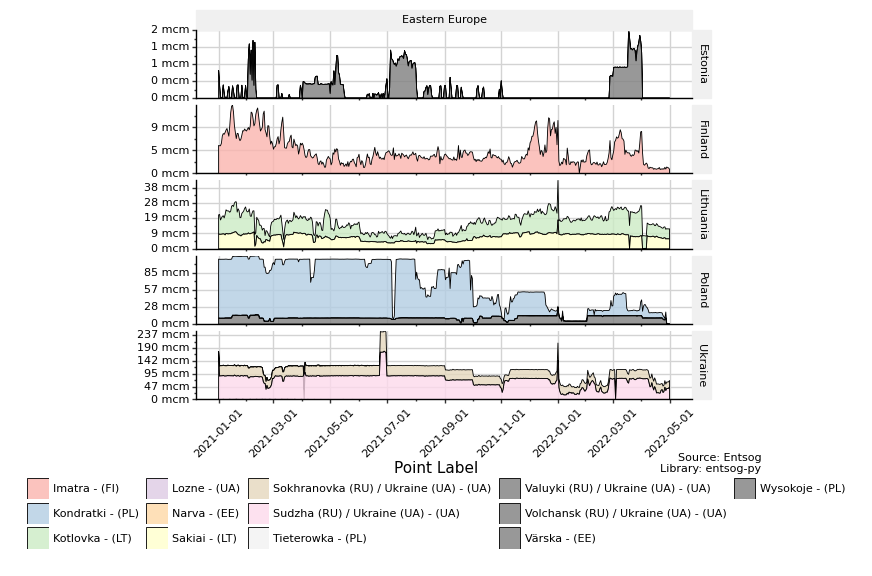

In [11]:
import plotnine as p9
import numpy as np

from entsog.plot_utils import plot_area

facet_row = 'country'
facet_col = 'adjacent_region'
flow_status = 'Confirmed'

print(plot_area(flow_data = flow_data, point_data = masked_points, unit = 'mcm', facet_row = facet_row, facet_col = facet_col, aggregation = '1D'))

